In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
import datetime, os
import IPython
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from numpy.random import seed
seed(42)

tf.random.set_seed(42)

In [4]:
#Read the CSV file into a dataframe. Available from https://www.kaggle.com/harlfoxem/housesalesprediction

data_file_path = 'Data/kc_house_data.csv'

housingData = pd.read_csv(data_file_path)

housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
housingData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
housingData.drop('id', axis=1, inplace=True)
housingData.drop('date', axis=1, inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

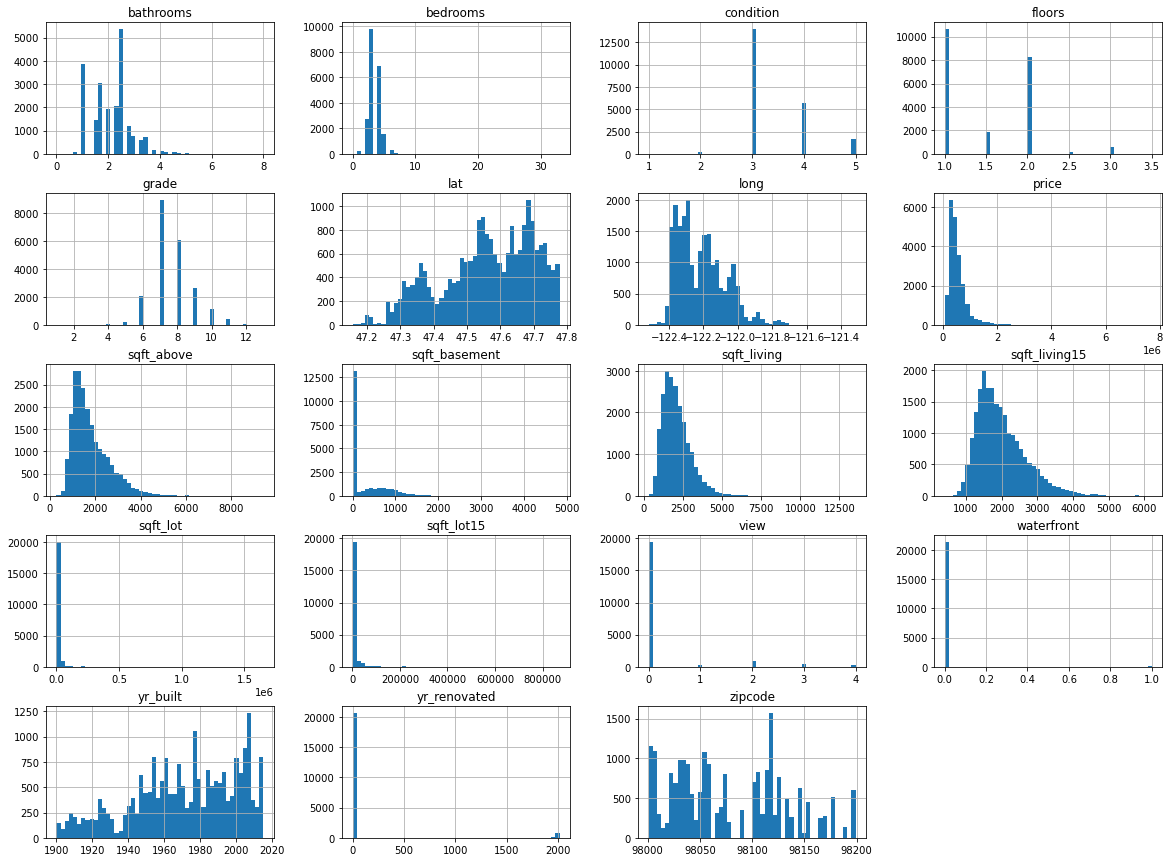

In [7]:
housingData.hist(bins=50,figsize=(20,15))
plt.show

In [8]:
housingData.drop('sqft_basement', axis=1, inplace=True)
housingData.drop('sqft_lot', axis=1, inplace=True)
housingData.drop('sqft_lot15', axis=1, inplace=True)
housingData.drop('view', axis=1, inplace=True)
housingData.drop('waterfront', axis=1, inplace=True)
housingData.drop('yr_renovated', axis=1, inplace=True)
housingData.drop('zipcode', axis=1, inplace=True)

In [9]:
housingData.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15
0,221900.0,3,1.00,1180,1.0,3,7,1180,1955,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,2.0,3,7,2170,1951,47.7210,-122.319,1690
2,180000.0,2,1.00,770,1.0,3,6,770,1933,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,1.0,5,7,1050,1965,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,1.0,3,8,1680,1987,47.6168,-122.045,1800


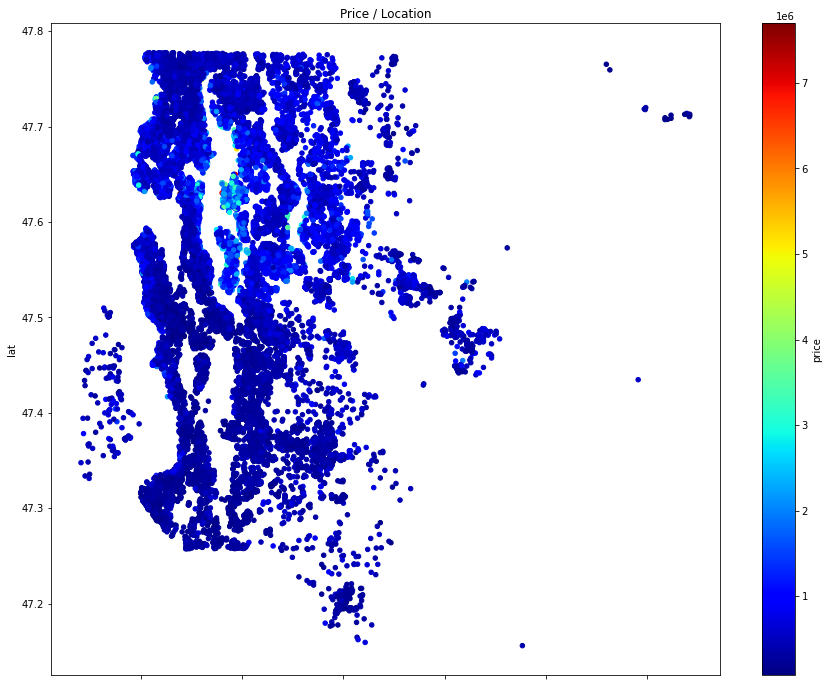

In [10]:
housingData.plot(kind="scatter", x="long", y="lat", c='price', cmap=plt.get_cmap("jet"), 
              colorbar=True,figsize=(15,12), title='Price / Location')

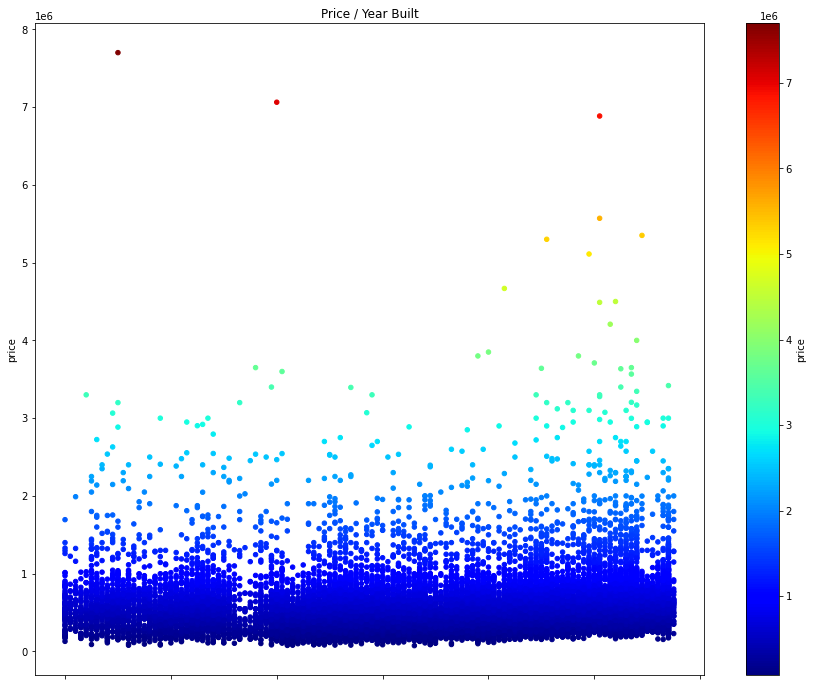

In [11]:
housingData.plot(kind="scatter", x="yr_built", y='price', c='price', cmap=plt.get_cmap("jet"), 
              colorbar=True,figsize=(15,12), title='Price / Year Built')

In [12]:
housingData['yr_built'].describe()

count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [13]:
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
housingData['yr_built'] = pd.cut(housingData['yr_built'], bins)

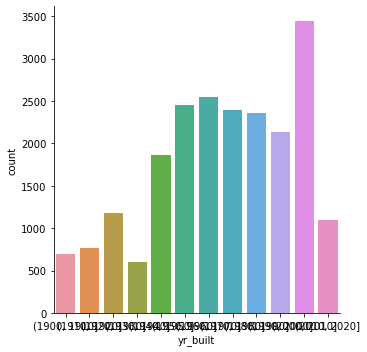

In [14]:
sns.catplot(x='yr_built', kind='count', data=housingData)


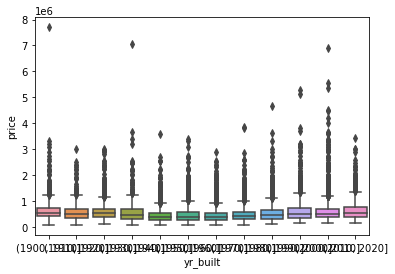

In [15]:
sns.boxplot(x='yr_built', y='price', data=housingData)

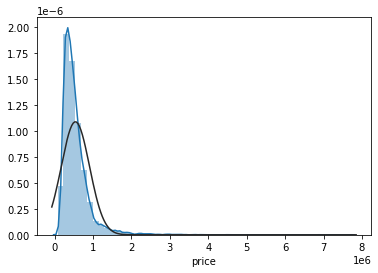

In [16]:
from scipy import stats
from scipy.stats import norm
from scipy.special import boxcox1p

#Price histogram and normal probability plot
sns.distplot(housingData['price'], fit=norm)


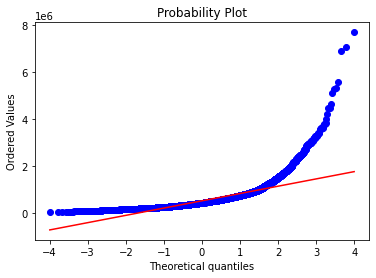

In [18]:
res=stats.probplot(housingData['price'],plot=plt)

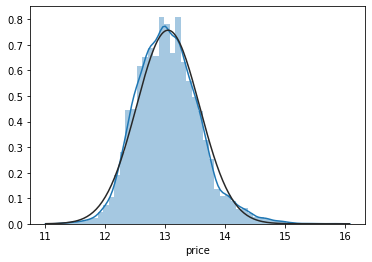

In [19]:
#Applying log transformation
housingData['price'] = np.log1p(housingData['price'])

#Price histogram and normal probability plot
sns.distplot(housingData['price'], fit=norm)

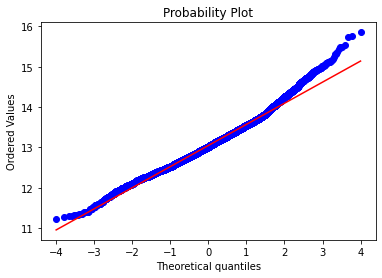

In [20]:
res=stats.probplot(housingData['price'],plot=plt)

In [21]:
#Applying log transformation
housingData['sqft_above'] = np.log1p(housingData['sqft_above'])
housingData['sqft_living'] = np.log1p(housingData['sqft_living'])
housingData['sqft_living15'] = np.log1p(housingData['sqft_living15'])

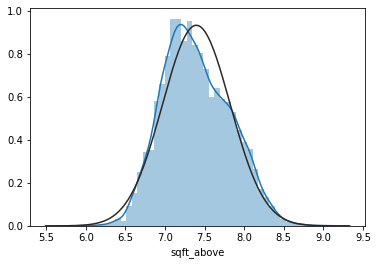

In [22]:
sns.distplot(housingData['sqft_above'], fit=norm)

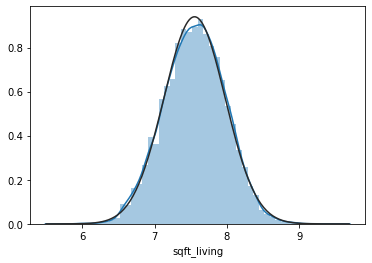

In [23]:
sns.distplot(housingData['sqft_living'], fit=norm)

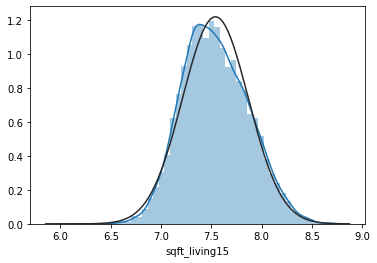

In [24]:
sns.distplot(housingData['sqft_living15'], fit=norm)

In [25]:
housingData = pd.get_dummies(housingData, columns=['yr_built'])

In [26]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  21613 non-null  float64
 1   bedrooms               21613 non-null  int64  
 2   bathrooms              21613 non-null  float64
 3   sqft_living            21613 non-null  float64
 4   floors                 21613 non-null  float64
 5   condition              21613 non-null  int64  
 6   grade                  21613 non-null  int64  
 7   sqft_above             21613 non-null  float64
 8   lat                    21613 non-null  float64
 9   long                   21613 non-null  float64
 10  sqft_living15          21613 non-null  float64
 11  yr_built_(1900, 1910]  21613 non-null  uint8  
 12  yr_built_(1910, 1920]  21613 non-null  uint8  
 13  yr_built_(1920, 1930]  21613 non-null  uint8  
 14  yr_built_(1930, 1940]  21613 non-null  uint8  
 15  yr

In [27]:
data = housingData.sample(frac=0.9, random_state=42)
evaluationData = housingData.drop(data.index)

data.reset_index(drop=True, inplace=True)
evaluationData.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(evaluationData.shape))

Data for Modeling: (19452, 23)
Unseen Data For Predictions: (2161, 23)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_train_norm = norm.transform(X)
    X_train_norm = pd.DataFrame(X_train_norm, columns=X.columns.values)

    return X_train_norm

In [29]:
y = data.price
X = data.drop('price',1)

X = getNormalizedData(X)

In [30]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42, test_size = 0.2)

In [31]:
def get_nn_simplemodel(n_inputs=22, n_outputs=1, optimizerinput='adam'):
    # create model
    model = Sequential()
    
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    model.add(layers.Dense(32, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizerinput)
    return model

In [32]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from tensorflow.keras import layers

#Hyperparameter Tuning to Tune Batch Size and Number of Epochs

from sklearn.model_selection import GridSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# create model
model = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, verbose=1)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [5, 10, 20]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    

Epoch 1/200
3891/3891 [==============================] - 2s 445us/step - loss: 3.5678
Epoch 2/200
3891/3891 [==============================] - 2s 434us/step - loss: 0.0959
Epoch 3/200
3891/3891 [==============================] - 2s 415us/step - loss: 0.0859
Epoch 4/200
3891/3891 [==============================] - 2s 416us/step - loss: 0.0808
Epoch 5/200
3891/3891 [==============================] - 2s 414us/step - loss: 0.0790
Epoch 6/200
3891/3891 [==============================] - 2s 418us/step - loss: 0.0773
Epoch 7/200
3891/3891 [==============================] - 2s 419us/step - loss: 0.0763
Epoch 8/200
3891/3891 [==============================] - 2s 422us/step - loss: 0.0756
Epoch 9/200
3891/3891 [==============================] - 2s 456us/step - loss: 0.0754
Epoch 10/200
3891/3891 [==============================] - 2s 411us/step - loss: 0.0748
Epoch 11/200
3891/3891 [==============================] - 2s 411us/step - loss: 0.0744
Epoch 12/200
3891/3891 [============================

3891/3891 [==============================] - 2s 434us/step - loss: 0.0417
Epoch 96/200
3891/3891 [==============================] - 2s 436us/step - loss: 0.0418
Epoch 97/200
3891/3891 [==============================] - 2s 421us/step - loss: 0.0415
Epoch 98/200
3891/3891 [==============================] - 2s 413us/step - loss: 0.0414
Epoch 99/200
3891/3891 [==============================] - 2s 415us/step - loss: 0.0414
Epoch 100/200
3891/3891 [==============================] - 2s 413us/step - loss: 0.0412
Epoch 101/200
3891/3891 [==============================] - 2s 431us/step - loss: 0.0414
Epoch 102/200
3891/3891 [==============================] - 2s 415us/step - loss: 0.0416
Epoch 103/200
3891/3891 [==============================] - 2s 439us/step - loss: 0.0411
Epoch 104/200
3891/3891 [==============================] - 2s 417us/step - loss: 0.0414
Epoch 105/200
3891/3891 [==============================] - 2s 406us/step - loss: 0.0408
Epoch 106/200
3891/3891 [=========================

3891/3891 [==============================] - 2s 426us/step - loss: 0.0376
Epoch 189/200
3891/3891 [==============================] - 2s 406us/step - loss: 0.0374
Epoch 190/200
3891/3891 [==============================] - 2s 410us/step - loss: 0.0373
Epoch 191/200
3891/3891 [==============================] - 2s 420us/step - loss: 0.0370
Epoch 192/200
3891/3891 [==============================] - 2s 408us/step - loss: 0.0375
Epoch 193/200
3891/3891 [==============================] - 2s 406us/step - loss: 0.0371
Epoch 194/200
3891/3891 [==============================] - 2s 408us/step - loss: 0.0371
Epoch 195/200
3891/3891 [==============================] - 2s 405us/step - loss: 0.0371
Epoch 196/200
3891/3891 [==============================] - 2s 412us/step - loss: 0.0372
Epoch 197/200
3891/3891 [==============================] - 2s 435us/step - loss: 0.0373
Epoch 198/200
3891/3891 [==============================] - 2s 433us/step - loss: 0.0371
Epoch 199/200
3891/3891 [=====================

In [33]:
#Hyperparameter Tuning to Tune Optimization Algorithm

from sklearn.model_selection import GridSearchCV

# create model
model = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), epochs=200, batch_size=5, n_outputs=1, verbose=1)

# define the grid search parameters
optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
  
    

Epoch 1/200
3891/3891 [==============================] - 2s 487us/step - loss: 3.9989
Epoch 2/200
3891/3891 [==============================] - 2s 453us/step - loss: 0.0923
Epoch 3/200
3891/3891 [==============================] - 2s 423us/step - loss: 0.0850
Epoch 4/200
3891/3891 [==============================] - 2s 422us/step - loss: 0.0778
Epoch 5/200
3891/3891 [==============================] - 2s 419us/step - loss: 0.0695
Epoch 6/200
3891/3891 [==============================] - 2s 432us/step - loss: 0.0652
Epoch 7/200
3891/3891 [==============================] - 2s 438us/step - loss: 0.0638
Epoch 8/200
3891/3891 [==============================] - 2s 425us/step - loss: 0.0629
Epoch 9/200
3891/3891 [==============================] - 2s 422us/step - loss: 0.0624
Epoch 10/200
3891/3891 [==============================] - 2s 423us/step - loss: 0.0616
Epoch 11/200
3891/3891 [==============================] - 2s 416us/step - loss: 0.0615
Epoch 12/200
3891/3891 [============================

3891/3891 [==============================] - 2s 431us/step - loss: 0.0448
Epoch 96/200
3891/3891 [==============================] - 2s 543us/step - loss: 0.0448
Epoch 97/200
3891/3891 [==============================] - 2s 447us/step - loss: 0.0445
Epoch 98/200
3891/3891 [==============================] - 2s 459us/step - loss: 0.0444
Epoch 99/200
3891/3891 [==============================] - 2s 469us/step - loss: 0.0444
Epoch 100/200
3891/3891 [==============================] - 2s 503us/step - loss: 0.0442
Epoch 101/200
3891/3891 [==============================] - 2s 456us/step - loss: 0.0443
Epoch 102/200
3891/3891 [==============================] - 2s 446us/step - loss: 0.0447
Epoch 103/200
3891/3891 [==============================] - 2s 470us/step - loss: 0.0441
Epoch 104/200
3891/3891 [==============================] - 2s 506us/step - loss: 0.0442
Epoch 105/200
3891/3891 [==============================] - 2s 475us/step - loss: 0.0440
Epoch 106/200
3891/3891 [=========================

3891/3891 [==============================] - 2s 412us/step - loss: 0.0400
Epoch 189/200
3891/3891 [==============================] - 2s 408us/step - loss: 0.0398
Epoch 190/200
3891/3891 [==============================] - 2s 412us/step - loss: 0.0398
Epoch 191/200
3891/3891 [==============================] - 2s 414us/step - loss: 0.0394
Epoch 192/200
3891/3891 [==============================] - 2s 413us/step - loss: 0.0397
Epoch 193/200
3891/3891 [==============================] - 2s 419us/step - loss: 0.0395
Epoch 194/200
3891/3891 [==============================] - 2s 419us/step - loss: 0.0393
Epoch 195/200
3891/3891 [==============================] - 2s 416us/step - loss: 0.0393
Epoch 196/200
3891/3891 [==============================] - 2s 420us/step - loss: 0.0396
Epoch 197/200
3891/3891 [==============================] - 2s 411us/step - loss: 0.0397
Epoch 198/200
3891/3891 [==============================] - 2s 425us/step - loss: 0.0395
Epoch 199/200
3891/3891 [=====================

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Get error using cross validation

# evaluate model
estimator = KerasRegressor(build_fn=get_nn_simplemodel, n_inputs=len(X.columns), n_outputs=1, epochs=200, batch_size=5, optimizerinput = 'Adam', verbose=0)

kfold = KFold(n_splits=5)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.04 (0.00) MSE


In [36]:
model=get_nn_simplemodel(len(X.columns),1, optimizerinput = 'Adam');
history = model.fit(train_X, train_y, verbose=1, epochs=200, batch_size=5, validation_data=(val_X, val_y))

Epoch 1/200
3113/3113 [==============================] - 2s 598us/step - loss: 5.0465 - val_loss: 0.1125
Epoch 2/200
3113/3113 [==============================] - 2s 509us/step - loss: 0.1001 - val_loss: 0.1135
Epoch 3/200
3113/3113 [==============================] - 2s 513us/step - loss: 0.0871 - val_loss: 0.0809
Epoch 4/200
3113/3113 [==============================] - 2s 492us/step - loss: 0.0824 - val_loss: 0.0850
Epoch 5/200
3113/3113 [==============================] - 2s 486us/step - loss: 0.0796 - val_loss: 0.0707
Epoch 6/200
3113/3113 [==============================] - 2s 488us/step - loss: 0.0775 - val_loss: 0.0691
Epoch 7/200
3113/3113 [==============================] - 2s 493us/step - loss: 0.0768 - val_loss: 0.0835
Epoch 8/200
3113/3113 [==============================] - 2s 501us/step - loss: 0.0759 - val_loss: 0.0739
Epoch 9/200
3113/3113 [==============================] - 2s 497us/step - loss: 0.0759 - val_loss: 0.0743
Epoch 10/200
3113/3113 [==============================]

3113/3113 [==============================] - 2s 535us/step - loss: 0.0526 - val_loss: 0.0507
Epoch 79/200
3113/3113 [==============================] - 2s 696us/step - loss: 0.0507 - val_loss: 0.0506
Epoch 80/200
3113/3113 [==============================] - 2s 631us/step - loss: 0.0499 - val_loss: 0.0474
Epoch 81/200
3113/3113 [==============================] - 2s 486us/step - loss: 0.0493 - val_loss: 0.0460
Epoch 82/200
3113/3113 [==============================] - 2s 485us/step - loss: 0.0491 - val_loss: 0.0448
Epoch 83/200
3113/3113 [==============================] - 2s 487us/step - loss: 0.0484 - val_loss: 0.0449
Epoch 84/200
3113/3113 [==============================] - 2s 527us/step - loss: 0.0478 - val_loss: 0.0458
Epoch 85/200
3113/3113 [==============================] - 2s 504us/step - loss: 0.0474 - val_loss: 0.0439
Epoch 86/200
3113/3113 [==============================] - 2s 490us/step - loss: 0.0469 - val_loss: 0.0448
Epoch 87/200
3113/3113 [==============================] - 2

Epoch 155/200
3113/3113 [==============================] - 2s 798us/step - loss: 0.0399 - val_loss: 0.0385
Epoch 156/200
3113/3113 [==============================] - 2s 750us/step - loss: 0.0398 - val_loss: 0.0380
Epoch 157/200
3113/3113 [==============================] - 2s 757us/step - loss: 0.0396 - val_loss: 0.0382
Epoch 158/200
3113/3113 [==============================] - 2s 742us/step - loss: 0.0399 - val_loss: 0.0508
Epoch 159/200
3113/3113 [==============================] - 2s 710us/step - loss: 0.0396 - val_loss: 0.0395
Epoch 160/200
3113/3113 [==============================] - 2s 799us/step - loss: 0.0396 - val_loss: 0.0372
Epoch 161/200
3113/3113 [==============================] - 2s 768us/step - loss: 0.0394 - val_loss: 0.0393
Epoch 162/200
3113/3113 [==============================] - 2s 748us/step - loss: 0.0398 - val_loss: 0.0385
Epoch 163/200
3113/3113 [==============================] - 2s 758us/step - loss: 0.0398 - val_loss: 0.0425
Epoch 164/200
3113/3113 [============

   loss_train  loss_val  diff_in_loss
0    5.046467  0.112494      4.933973
1    0.100094  0.113507      0.013413
2    0.087088  0.080902      0.006186
3    0.082419  0.084999      0.002580
4    0.079584  0.070652      0.008932
5    0.077524  0.069131      0.008393
6    0.076827  0.083534      0.006707
7    0.075916  0.073906      0.002011
8    0.075881  0.074319      0.001562
9    0.075788  0.081584      0.005796


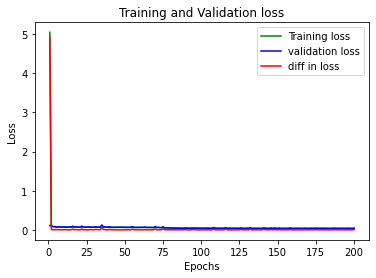

In [45]:
from datetime import datetime

# Code to create graph for train vs validation error for different epochs

loss_train = history.history['loss']
loss_val = history.history['val_loss']

diff_in_loss=abs(np.subtract(loss_val,loss_train));

df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'train_vs_Validation_loss_'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)

df.to_excel("neural_network_train_vs_val_loss"+timeStr+".xlsx", sheet_name='TrainvsValLoss')

plt.show()

In [46]:
test = evaluationData.copy()
test.drop('price', axis=1,inplace=True)

test = getNormalizedData(test)

test.head()

,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,lat,long,sqft_living15,...,"yr_built_(1920, 1930]","yr_built_(1930, 1940]","yr_built_(1940, 1950]","yr_built_(1950, 1960]","yr_built_(1960, 1970]","yr_built_(1970, 1980]","yr_built_(1980, 1990]","yr_built_(1990, 2000]","yr_built_(2000, 2010]","yr_built_(2010, 2020]"
0,0.375,0.434783,0.539547,0.5,0.50,0.375,0.539547,0.304496,0.434353,0.578649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.250,0.173913,0.375256,0.0,0.75,0.375,0.274578,0.852180,0.199640,0.289301,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.375,0.304348,0.431250,0.0,0.75,0.375,0.431250,0.720538,0.421763,0.303927,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.500,0.434783,0.675448,0.5,0.50,0.625,0.675448,0.800579,0.201439,0.478194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.375,0.391304,0.582934,0.0,0.75,0.500,0.481370,0.415531,0.157374,0.614502,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#code to print actual, predicted, diff in values

predicted=model.predict(test);
actual=evaluationData['price'];

predicted = np.expm1(predicted)
actual = np.expm1(actual)


In [48]:
y_flat=actual.values.flatten();

predicted_flat=predicted.flatten()

residue=abs(np.subtract(y_flat,predicted_flat))

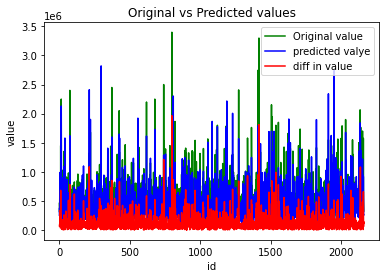

In [49]:
#Plot
xasix = range(1,len(y_flat)+1)

plt.plot(xasix, y_flat, 'g', label='Original value')
plt.plot(xasix, predicted_flat, 'b', label='predicted valye')
plt.plot(xasix, residue, 'r', label='diff in value')

plt.title('Original vs Predicted values')
plt.xlabel('id')
plt.ylabel('value')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'Original_vs_Predicted_y'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)

plt.show()

#Write to file
df = pd.DataFrame({'y1':y_flat, 'pred':predicted_flat, 'residue':residue})

df.to_excel("neural_network_output"+timeStr+".xlsx", sheet_name='Sheet_name_1')

#Data frame to include all X,y, predicted y and difference between actual y and predicted y
masterdf = X.merge(df,left_index=True, right_index=True)
masterdf.to_excel("master_analysis_"+timeStr+".xlsx", sheet_name='Sheet_name_1')